# KAIST Summer Session 2018

## Linear Regression in the PyTorch Way (08.16.2018)

1. Linear regression in a statistical style
2. Linear regression in a machine learning style 
3. Linear regression in the PyTorch style

### 0. Data Preparation

- This example dataset comes from STATA.

- Simply, we regress (car) price on mpg (mileage) without constant.

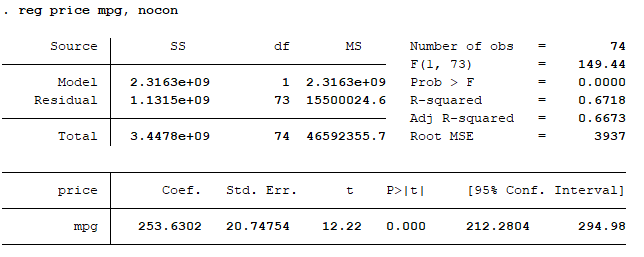

In [1]:
import pandas as pd
import numpy as np

df = pd.read_excel('linear regression.xlsx')
a= df.as_matrix()

np.set_printoptions(suppress=True)

y = np.array([a[:,0]]).astype('float').T
x = np.array([a[:,1]]).astype('float').T

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


### 1. Linear regression in a statistical style

- OLS Estimator
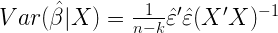

In [2]:
coefficient = np.dot(np.linalg.inv(np.dot(x.T,x)),np.dot(x.T,y))
print(coefficient)

[[253.63019329]]


- Statsmodels is a Python module that provides classes and functions for the estimation of many different statistical models

In [3]:
import statsmodels.api as sm

model = sm.OLS(y, x)
results = model.fit()
print(results.params)
print(results.summary())

p = 25
# Before training
print('\npredict (using OLS)')
print('If mileage is {}, the predicted price is {}'. format(p, results.predict(p)))

[253.63019329]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     149.4
Date:                Thu, 16 Aug 2018   Prob (F-statistic):           2.46e-19
Time:                        17:39:22   Log-Likelihood:                -717.08
No. Observations:                  74   AIC:                             1436.
Df Residuals:                      73   BIC:                             1438.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           253.6302     20.748     

### 2. Linear regression in a machine learning style 

In [4]:
# random guess for the coefficient
w = 1


def forward(x):
    return x * w


# Loss function
def loss(x, y):
    y_pred = forward(x)
    return (y_pred - y) * (y_pred - y)


# Compute gradient
def gradient(x, y):  # d_loss/d_w
    return 2 * x * (x * w - y)


p = 25
# Before training
print('Predict (before training)')
print('If mileage is {}, the predicted price is {}\n'. format(p, forward(p)))

learning_rate = 0.00001
# Training loop
for epoch in range(100):
    for x_val, y_val in zip(x, y):
        l = loss(x_val, y_val)
        grad = gradient(x_val, y_val)
        w = w - learning_rate * grad

    print("progress:", epoch, "w=", w, "loss=", l, "gradient", grad)

    
# After training
print('\nPredict (after training)')
print('Yrained coefficient is {}'.format(w))
print('If mileage is {}, the predicted price is {}'. format(p, forward(p)))

Predict (before training)
If mileage is 25, the predicted price is 25

progress: 0 w= [127.71582257] loss= [97633031.92389761] gradient [-335952.05744872]
progress: 1 w= [189.09480023] loss= [77994227.99938938] gradient [-300268.75889325]
progress: 2 w= [218.82572746] loss= [69273493.8539518] gradient [-282984.37924233]
progress: 3 w= [233.22688022] loss= [65235135.95342001] gradient [-274612.12129502]
progress: 4 w= [240.20255236] loss= [63322621.99347136] gradient [-270556.74270743]
progress: 5 w= [243.58144867] loss= [62406462.08851564] gradient [-268592.38666486]
progress: 6 w= [245.21812826] loss= [61965089.93012799] gradient [-267640.8861875]
progress: 7 w= [246.01090787] loss= [61751859.91607811] gradient [-267179.99562652]
progress: 8 w= [246.39491675] loss= [61648707.06462485] gradient [-266956.74811981]
progress: 9 w= [246.58092409] loss= [61598772.5864269] gradient [-266848.61084501]
progress: 10 w= [246.67102287] loss= [61574592.45228353] gradient [-266796.23099819]
progres

### 3. Linear regression in the PyTorch style

#### 3.1 Auto-gradient

In [5]:
import torch

w = torch.tensor(1.0,  requires_grad=True)

p = 25
# Before training
print('predict (before training)')
print('If mileage is {}, the predicted price is {}\n'. format(p, forward(p)))


learning_rate = 0.00001
# Training loop
for epoch in range(100):
    for x_val, y_val in zip(x, y):
        x_val = int(x_val)
        y_val = int(y_val)
        l = loss(x_val, y_val)
        l.backward()
        w.data = w.data - learning_rate * w.grad
        w.grad.zero_()

    print("progress:", epoch, "w=", w.item())

    
# After training
print('\npredict (after training)')
print('trained coefficient is {}'.format(w))
print('If mileage is {}, the predicted price is {}'. format(p, forward(p)))

predict (before training)
If mileage is 25, the predicted price is 25.0

progress: 0 w= 127.7158203125
progress: 1 w= 189.0947265625
progress: 2 w= 218.8257598876953
progress: 3 w= 233.22691345214844
progress: 4 w= 240.20260620117188
progress: 5 w= 243.5814971923828
progress: 6 w= 245.21817016601562
progress: 7 w= 246.01095581054688
progress: 8 w= 246.39491271972656
progress: 9 w= 246.58091735839844
progress: 10 w= 246.6710205078125
progress: 11 w= 246.7146759033203
progress: 12 w= 246.73580932617188
progress: 13 w= 246.7460174560547
progress: 14 w= 246.7509765625
progress: 15 w= 246.75340270996094
progress: 16 w= 246.7545166015625
progress: 17 w= 246.75511169433594
progress: 18 w= 246.75546264648438
progress: 19 w= 246.75564575195312
progress: 20 w= 246.7556915283203
progress: 21 w= 246.75572204589844
progress: 22 w= 246.75572204589844
progress: 23 w= 246.75572204589844
progress: 24 w= 246.75572204589844
progress: 25 w= 246.75572204589844
progress: 26 w= 246.75572204589844
progress: 2

#### 3.2 PyTorch style

1) Design your model as a class using tensor

2) Set the loss and optimizer (from PyTorch API)

3) Conduct the training cycle (forward, backward, update)

In [6]:
# Design the model as a class
class Model(torch.nn.Module):

    def __init__(self):
        super(Model, self).__init__()
        self.linear = torch.nn.Linear(1, 1)  # One in and one out

    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred
    
    
# Instantiate the model  
model = Model()


# Set loss and optimizer function
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.00001)


# Training loop
for epoch in range(1000):
    # Forward pass: Compute predicted y by passing x to the model
    x_data = torch.from_numpy(x).float()
    y_pred = model(x_data)

    # Compute and print loss
    y_data = torch.from_numpy(y).float()
    loss = criterion(y_pred, y_data)
    print("progress:", epoch, "w=", list(model.parameters())[0].item())

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


# After training
predict_var = torch.tensor([25.0])
print('\npredict (after training)')
print('If mileage is {}, the predicted price is {}'. format(predict_var.item(), model(predict_var).item()))

progress: 0 w= 0.9235047101974487
progress: 1 w= 3.382446765899658
progress: 2 w= 5.817407131195068
progress: 3 w= 8.228618621826172
progress: 4 w= 10.616312980651855
progress: 5 w= 12.980720520019531
progress: 6 w= 15.322066307067871
progress: 7 w= 17.64057731628418
progress: 8 w= 19.936473846435547
progress: 9 w= 22.209978103637695
progress: 10 w= 24.461307525634766
progress: 11 w= 26.6906795501709
progress: 12 w= 28.898305892944336
progress: 13 w= 31.084402084350586
progress: 14 w= 33.249176025390625
progress: 15 w= 35.3928337097168
progress: 16 w= 37.51558303833008
progress: 17 w= 39.61763000488281
progress: 18 w= 41.69917297363281
progress: 19 w= 43.760414123535156
progress: 20 w= 45.801551818847656
progress: 21 w= 47.82278060913086
progress: 22 w= 49.82429504394531
progress: 23 w= 51.8062858581543
progress: 24 w= 53.768943786621094
progress: 25 w= 55.712459564208984
progress: 26 w= 57.637020111083984
progress: 27 w= 59.54280471801758
progress: 28 w= 61.43000030517578
progress: 29

progress: 309 w= 240.7554168701172
progress: 310 w= 240.8738555908203
progress: 311 w= 240.9911346435547
progress: 312 w= 241.10726928710938
progress: 313 w= 241.22225952148438
progress: 314 w= 241.33612060546875
progress: 315 w= 241.44886779785156
progress: 316 w= 241.56051635742188
progress: 317 w= 241.6710662841797
progress: 318 w= 241.78053283691406
progress: 319 w= 241.88893127441406
progress: 320 w= 241.9962615966797
progress: 321 w= 242.1025390625
progress: 322 w= 242.207763671875
progress: 323 w= 242.3119659423828
progress: 324 w= 242.41514587402344
progress: 325 w= 242.51730346679688
progress: 326 w= 242.61846923828125
progress: 327 w= 242.71864318847656
progress: 328 w= 242.8178253173828
progress: 329 w= 242.91603088378906
progress: 330 w= 243.01327514648438
progress: 331 w= 243.1095733642578
progress: 332 w= 243.20492553710938
progress: 333 w= 243.29933166503906
progress: 334 w= 243.392822265625
progress: 335 w= 243.48538208007812
progress: 336 w= 243.57704162597656
progress

progress: 659 w= 252.34222412109375
progress: 660 w= 252.3454132080078
progress: 661 w= 252.34857177734375
progress: 662 w= 252.3516845703125
progress: 663 w= 252.35476684570312
progress: 664 w= 252.35781860351562
progress: 665 w= 252.36082458496094
progress: 666 w= 252.36380004882812
progress: 667 w= 252.3667449951172
progress: 668 w= 252.36964416503906
progress: 669 w= 252.3725128173828
progress: 670 w= 252.37535095214844
progress: 671 w= 252.37815856933594
progress: 672 w= 252.38092041015625
progress: 673 w= 252.38365173339844
progress: 674 w= 252.3863525390625
progress: 675 w= 252.38902282714844
progress: 676 w= 252.39166259765625
progress: 677 w= 252.39427185058594
progress: 678 w= 252.39683532714844
progress: 679 w= 252.3993682861328
progress: 680 w= 252.40187072753906
progress: 681 w= 252.4043426513672
progress: 682 w= 252.4067840576172
progress: 683 w= 252.40919494628906
progress: 684 w= 252.4115753173828
progress: 685 w= 252.41392517089844
progress: 686 w= 252.41624450683594
p